# The Single Neuron

The Single Neuron project.

Dataset:
Titanic - https://www.kaggle.com/heptapod/titanic  
Hotdog -https://www.kaggle.com/dansbecker/hot-dog-not-hot-dog

Inspirations:
  - https://towardsdatascience.com/a-logistic-regression-from-scratch-3824468b1f88

## Rules
- Use a completely new dataset
- Access to Logistic Regresison Colab notebook
- Access to Coursera notes
- No access to previously written code

## General outline
- Understanding the dataset
- Create the general architecture of the algorithm
  - z
  - activation function
  - Loss function
  - Cost function
  - Forward propagation
  - Backward propagation
  - Update parameters for optimization
  - predict()
- final model

## References
- https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17
- https://www.kaggle.com/sonumj/logistic-regression-from-scratch
- https://www.kaggle.com/startupsci/titanic-data-science-solutions
- https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
- https://dhirajkumarblog.medium.com/logistic-regression-in-python-from-scratch-5b901d72d68e

In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

from sklearn.datasets import fetch_openml

## Handling the dataset

In [ ]:
training_hot_dog = "/content/drive/MyDrive/colab-notebooks/the-single-neuron/hotdogs/train/hot_dog"
training_not_hot_dog = "/content/drive/MyDrive/colab-notebooks/the-single-neuron/hotdogs/train/not_hot_dog"
testing_hot_dog = "/content/drive/MyDrive/colab-notebooks/the-single-neuron/hotdogs/test/hot_dog"
testing_not_hot_dog = "/content/drive/MyDrive/colab-notebooks/the-single-neuron/hotdogs/test/not_hot_dog"

training_hot_dog_data = [os.path.join(training_hot_dog, image_file) for image_file in os.listdir(training_hot_dog)]
training_not_hot_dog_data = [os.path.join(training_not_hot_dog, image_file) for image_file in os.listdir(training_not_hot_dog)]

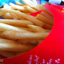

In [ ]:
Image.open(training_not_hot_dog_data[200]).resize((64,64))

In [ ]:
testing_im = Image.open(training_hot_dog_data[0]).resize((64,64))
testing_np_array = np.array(testing_im)
testing_flatten = testing_np_array.reshape(-1).T
print(testing_flatten)
print(testing_flatten.size)

[207 198 196 ... 171 180 189]
12288


In [ ]:
training_hot_dogs = []
training_not_hot_dogs = []
training_X = []
training_Y = []

for i in range(249):
  temp_image = Image.open(training_hot_dog_data[i]).resize((64,64))
  temp_image_np_array = np.array(temp_image)
  temp_image_flattened = temp_image_np_array.reshape(-1).T
  training_hot_dogs.append((temp_image_flattened, 1))

for i in range(249):
  temp_image = Image.open(training_not_hot_dog_data[i]).resize((64,64))
  temp_image_np_array = np.array(temp_image)
  temp_image_flattened = temp_image_np_array.reshape(-1).T
  training_not_hot_dogs.append((temp_image_flattened, 0))

combined_training = training_hot_dogs + training_not_hot_dogs
random.shuffle(combined_training)
# print(combined_training)
for i in range(498):
  training_X.append(combined_training[i][0])
  training_Y.append(combined_training[i][1])


In [ ]:
testing_hot_dog_data = [os.path.join(testing_hot_dog, image_file) for image_file in os.listdir(testing_hot_dog)]
testing_not_hot_dog_data = [os.path.join(testing_not_hot_dog, image_file) for image_file in os.listdir(testing_not_hot_dog)]

testing_hot_dogs = []
testing_not_hot_dogs = []
testing_X = []
testing_Y = []

for i in range(249):
  temp_image = Image.open(testing_hot_dog_data[i]).resize((64,64))
  temp_image_np_array = np.array(temp_image)
  temp_image_flattened = temp_image_np_array.reshape(-1).T
  testing_hot_dogs.append((temp_image_flattened, 1))

for i in range(249):
  temp_image = Image.open(testing_not_hot_dog_data[i]).resize((64,64))
  temp_image_np_array = np.array(temp_image)
  temp_image_flattened = temp_image_np_array.reshape(-1).T
  testing_not_hot_dogs.append((temp_image_flattened, 0))

combined_testing = testing_hot_dogs + testing_not_hot_dogs
random.shuffle(combined_testing)
# print(combined_training)
for i in range(498):
  testing_X.append(combined_testing[i][0])
  testing_Y.append(combined_testing[i][1])


In [ ]:
training_X = [num/255 for num in training_X]
testing_X = [num/255 for num in testing_X]
print(testing_X[0])

[0.30588235 0.1254902  0.02352941 ... 0.09411765 0.08627451 0.08235294]


## MNIST

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
from sklearn.model_selection import train_test_split

mnist_training_X ,mnist_testing_X,  mnist_training_Y, mnist_testing_Y = train_test_split(digits.data, digits.target, test_size = 0.25)

for i in range(len(mnist_training_Y)):
  if mnist_training_Y[i] % 2 == 0:
    mnist_training_Y[i] = 1
  else:
    mnist_training_Y[i] = 0

for i in range(len(mnist_testing_Y)):
  if mnist_testing_Y[i] % 2 == 0:
    mnist_testing_Y[i] = 1
  else:
    mnist_testing_Y[i] = 0

# even or not

In [ ]:
print(mnist_training_X) # 1347, 64

[[ 0.  0.  3. ...  2.  0.  0.]
 [ 0.  1. 13. ...  0.  0.  0.]
 [ 0.  0.  9. ... 11.  1.  0.]
 ...
 [ 0.  0.  3. ...  0.  0.  0.]
 [ 0.  0.  5. ...  7.  0.  0.]
 [ 0.  0.  9. ...  0.  0.  0.]]


In [ ]:
print(mnist_testing_X)

[[ 0.  0.  0. ...  8.  0.  0.]
 [ 0.  0.  0. ... 16. 11.  0.]
 [ 0.  4. 15. ...  0.  0.  0.]
 ...
 [ 0.  0.  8. ... 15.  5.  0.]
 [ 0.  1. 10. ... 16. 11.  0.]
 [ 0.  0.  5. ...  2.  0.  0.]]


## Coding

In [ ]:
def sigmoid(W, x_single_instance, b):
  scalar = 0
  for i in range(len(W)):
    scalar += W[i]*x_single_instance[i]
  return 1/(1+np.exp(-(scalar + b)))

In [ ]:
def loss(y_predict, y):
  return -(y*math.log(y_predict+0.00000001)+(1-y)*math.log(1-y_predict+0.00000001))

In [ ]:
def initialize_to_zero(dimension):
  dW=[]
  db=0
  for i in range(dimension):
    dW.append(0)
  return dW, db

In [ ]:
def propagate_one_step(W, b, X, Y, m_x, n_x, learning_rate):
  dW, db = initialize_to_zero(m_x)
  J = 0

  for i in range(n_x):
    a = sigmoid(W, X[i], b)
    # print(a)
    # print(a - Y[i])
    J += loss(a, Y[i])
    dz = a - Y[i]
    # print(dz)
    for j in range(m_x):
      dW[j] += X[i][j]*dz
      # print(j)
    db += dz
  
  # print('pre')
  # print(dW)
  # print(db)

  J = J/m_x
  db = db/m_x
  dW = [num / m_x for num in dW]

  # print('aft')
  # print(dW)
  # print(db)

  for n in range(len(W)):
    W[n] = W[n] - learning_rate*dW[n]
  b = b - learning_rate*db 

  return W, b


In [ ]:
def predict(W, b, x):
  a = sigmoid(W, x, b)
  # print(a)

  if a > 0.5:
    return 1
  else:
    return 0

In [ ]:
def model(X_train, Y_train, X_test, Y_test, m_x, n_x, learning_rate, num_iterations):
  W = []
  for i in range(m_x):
    W.append(0.01 * np.random.randn())
  b = 0
  for i in range(num_iterations):
    W, b = propagate_one_step(W, b, X_train, Y_train, m_x, n_x, learning_rate)

  correct = 0
  count = 0
  for inst in X_test:
    predicted = predict(W, b, inst)
    if predicted == Y_test[count]:
      count += 1
      correct += 1
    else:
      count += 1
  print(correct/count)



In [ ]:
result = model(mnist_training_X, mnist_training_Y, mnist_testing_X, mnist_testing_Y, 64, 1347, 0.02, 50)

0.9022222222222223


## Numpy version


In [ ]:
def np_sigmoid(w, x, b):
  scalar = np.dot(w, x.T)+b
  return 1/(1+np.exp(-(scalar + b)))

In [ ]:
def np_loss(y_predict, y):
  return -(y*np.log(y_predict)+(1-y)*np.log(1-y_predict))

  # https://numpy.org/doc/stable/user/quickstart.html

In [ ]:
def np_initialize_to_zero(dimension):
  dW=np.zeros((1,dimension))
  db=0
  return dW, db

In [ ]:
def np_propagate_one_step(W, b, X, Y, m_x, n_x, learning_rate):
  dW, db = np_initialize_to_zero(m_x)
  J = 0

  A = np_sigmoid(W,X,b)
  J = np_loss(A, Y)
  dZ = A - Y
  dW = np.dot(dZ, X)
  db = np.sum(dZ)

  # for i in range(n_x):
  #   a = np_sigmoid(W, X[i], b)
  #   # print(a)
  #   # print(a - Y[i])
  #   J += np_loss(a, Y[i])
  #   dz = a - Y[i]
  #   # print(dz)
  #   dW += X[i]*dz
  #   db += dz

  J = J/m_x
  db = db/m_x
  dW = dW/m_x

  W = W - learning_rate*dW
  b = b - learning_rate*db 

  return W, b


In [ ]:
def np_predict(W, b, X):
  p = np_sigmoid(W,X,b)
  pre = []

  for i in p[0]:
    if i > 0.5:
      pre.append(1)
    else:
      pre.append(0)
  return pre

In [ ]:
def np_model(X_train, Y_train, X_test, Y_test, m_x, n_x, learning_rate, num_iterations):
  W = 0.01*np.random.randn(1, m_x)
  b = 0
  for i in range(num_iterations):
    W, b = np_propagate_one_step(W, b, X_train, Y_train, m_x, n_x, learning_rate)

  correct = 0
  count = 0

  # print(W.shape)
  # print(X_test.shape)
  predicted = np_predict(W,b, X_test)

  for i in range(len(Y_test)):
    if predicted[i] == Y_test[i]:
      count += 1
      correct += 1
    else:
      count += 1
  print(correct/count)

# https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17

In [ ]:
# training_X = np.array(training_X, np.float64)
# training_Y = np.array(training_Y,  np.float64)
# testing_X = np.array(testing_X,  np.float64)
# testing_Y = np.array(testing_Y,  np.float64)

In [ ]:
# result = np_model(mnist_training_X, mnist_training_Y, mnist_testing_X, mnist_testing_Y, 12288, 498, 0.02, 20000)

result = np_model(mnist_training_X, mnist_training_Y, mnist_testing_X, mnist_testing_Y, 64, 1347, 0.02, 20000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


0.8911111111111111


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(mnist_training_X, mnist_training_Y)

sk_predictions = lr.predict(mnist_testing_X)

score = lr.score(mnist_testing_X, mnist_testing_Y)
print(score)

0.8911111111111111


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
l = [1, 2, 3, 4, 5]
for i in range(len(l)):
  if l[i]% 2 == 0:
    l[i] = 1
  else:
    l[i] = 0
print(l)

[0, 1, 0, 1, 0]


This is a test run of the Git integration with Google colab.